In [1]:
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import partial_trace
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi
from numpy.random import randint
import numpy as np
from qiskit import IBMQ
from qiskit_ibm_provider import IBMProvider, least_busy

apitoken = 'add822bdd7a0cf338059a6157b26e50155c5bba4fc90826592b20ff80f379a99c8aefe0e52ad3dd304ead3d46edca9af9a9c507bd0096c1c085ce7b369c8e422' #insert api token here

# #for account loading
# IBMProvider.save_account(token=apitoken)
# IBMProvider.load_account()
# provider = IBMProvider()
# backend = least_busy(provider.backends(filters=lambda x:
# x.configuration().n_qubits >= 2
# and not x.configuration().simulator
# and x.status().operational==True))
# print("least busy backend: ", backend)


In [2]:
q = QuantumRegister(4)
c = ClassicalRegister(4)

In [3]:
circuit = QuantumCircuit(q,c)

#EPR pairs
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.h(q[2])
circuit.cx(q[2], q[3])

#bell measure
circuit.cx(q[1], q[2])
circuit.h(q[1])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])

#apply gate
circuit.z(q[3]).c_if(c[1],1)
circuit.x(q[3]).c_if(c[2],1)

circuit.draw()

┌───┐                                          
q0_0: ┤ H ├──■───────────────────────────────────────
      └───┘┌─┴─┐     ┌───┐┌─┐                        
q0_1: ─────┤ X ├──■──┤ H ├┤M├────────────────────────
      ┌───┐└───┘┌─┴─┐└┬─┬┘└╥┘                        
q0_2: ┤ H ├──■──┤ X ├─┤M├──╫─────────────────────────
      └───┘┌─┴─┐└───┘ └╥┘  ║    ┌───┐       ┌───┐    
q0_3: ─────┤ X ├───────╫───╫────┤ Z ├───────┤ X ├────
           └───┘       ║   ║    └─╥─┘       └─╥─┘    
                       ║   ║ ┌────╨─────┐┌────╨─────┐
c0: 4/═════════════════╩═══╩═╡ c0_1=0x1 ╞╡ c0_2=0x1 ╞
                       2   1 └──────────┘└──────────┘

In [4]:
circuit.cx(q[0], q[3])
circuit.h(q[0])
circuit.measure(q[0], c[0])
circuit.measure(q[3], c[3])
circuit.draw()

┌───┐                                               ┌───┐┌─┐
q0_0: ┤ H ├──■─────────────────────────────────────────■──┤ H ├┤M├
      └───┘┌─┴─┐     ┌───┐┌─┐                          │  └───┘└╥┘
q0_1: ─────┤ X ├──■──┤ H ├┤M├──────────────────────────┼────────╫─
      ┌───┐└───┘┌─┴─┐└┬─┬┘└╥┘                          │        ║ 
q0_2: ┤ H ├──■──┤ X ├─┤M├──╫───────────────────────────┼────────╫─
      └───┘┌─┴─┐└───┘ └╥┘  ║    ┌───┐       ┌───┐    ┌─┴─┐ ┌─┐  ║ 
q0_3: ─────┤ X ├───────╫───╫────┤ Z ├───────┤ X ├────┤ X ├─┤M├──╫─
           └───┘       ║   ║    └─╥─┘       └─╥─┘    └───┘ └╥┘  ║ 
                       ║   ║ ┌────╨─────┐┌────╨─────┐       ║   ║ 
c0: 4/═════════════════╩═══╩═╡ c0_1=0x1 ╞╡ c0_2=0x1 ╞═══════╩═══╩═
                       2   1 └──────────┘└──────────┘       3   0

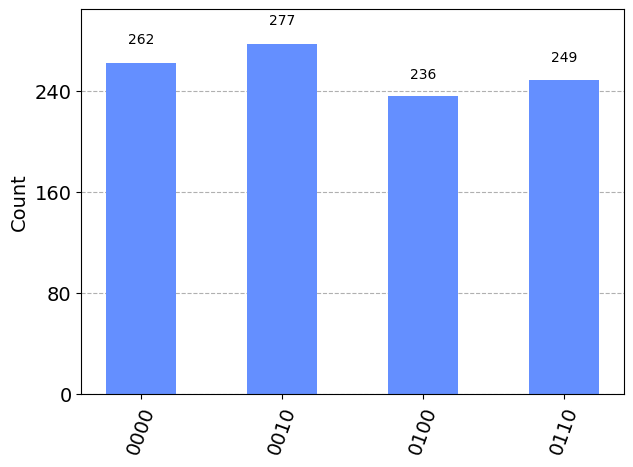

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)